# Machine Learning using Decision Trees and Random Forests

We will use the public Lending Club loan dataset from Kaggle (https://www.kaggle.com/datasets/braindeadcoder/lending-club-data). Lending Club is a service that connects borrowers with investors. We will try to create a model that will help predict if a person has a high probability of paying the loan back.

## About the data

The dataset is from 2007-2010 and try to classify and predict whether or not the borrower paid back their loan in full. 

The data set contains the following features:

    * credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
    * purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
    * int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
    * installment: The monthly installments owed by the borrower if the loan is funded.
    * log.annual.inc: The natural log of the self-reported annual income of the borrower.
    * dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
    * fico: The FICO credit score of the borrower.
    * days.with.cr.line: The number of days the borrower has had a credit line.
    * revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
    * revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
    * inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
    * delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
    * pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Loading libraries

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score


%matplotlib inline

## Loading data

In [9]:
file = "./loan_data.csv"
df = pd.read_csv(file)

## 1 - Exploratory data analysis

Preliminary exploration involved examining the structure, dimensions, and characteristics of the dataset.

### General analysis

In [11]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
df.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [13]:
df.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
3074,1,debt_consolidation,0.1158,297.13,10.685103,14.03,707,6090.000000,7693,72.6,3,0,0,1
6102,1,all_other,0.0894,190.63,11.561716,10.42,727,4560.041667,10465,44.0,0,0,0,1
2679,1,debt_consolidation,0.1221,599.67,10.869064,13.36,742,5640.000000,17064,56.7,0,0,0,0
7163,1,debt_consolidation,0.1904,916.95,11.461632,16.03,712,5640.041667,33894,99.4,0,0,0,0
2686,1,small_business,0.1284,806.83,11.225243,18.51,772,6780.000000,7815,6.1,0,0,0,0


In [14]:
columns = df.columns
columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [15]:
df.shape

(9578, 14)

In [17]:
df.nlargest(10,'days.with.cr.line')

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8430,0,all_other,0.1166,462.74,12.388394,15.27,697,17639.95833,161129,57.0,6,0,0,0
7553,1,credit_card,0.1062,683.76,10.819778,15.18,737,17616.00000,31725,32.8,0,0,0,0
5801,1,all_other,0.0705,92.70,10.858999,11.22,777,16652.00000,14444,26.6,0,0,0,0
6014,1,small_business,0.1531,678.90,11.407565,15.89,792,16350.00000,34039,1.6,4,0,0,0
8531,0,all_other,0.1766,116.95,10.691945,26.84,647,16260.00000,31416,97.6,4,1,0,0
192,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.04167,50,0.3,0,0,0,0
113,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.00000,50,0.3,0,0,0,0
6768,1,all_other,0.1461,96.54,9.501516,3.14,672,15990.00000,709,22.9,0,0,0,0
5766,1,all_other,0.1148,164.85,10.308953,9.92,747,15692.00000,452,90.4,0,0,0,1
2506,1,all_other,0.1253,301.20,10.596635,0.90,732,15420.95833,114,2.8,0,0,0,0


In [19]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [20]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

No missing values were detected, facilitating seamless analysis and modeling.

### Quick data visualization

The relationship bertween different variables in the dataset can be explored using quick basic visualizations.

We'll begin by creating a dual histogram that represents the FICO scores of borrowers, differentiated based on whether they meet the credit policy criteria or not.

Text(0.5, 0, 'FICO')

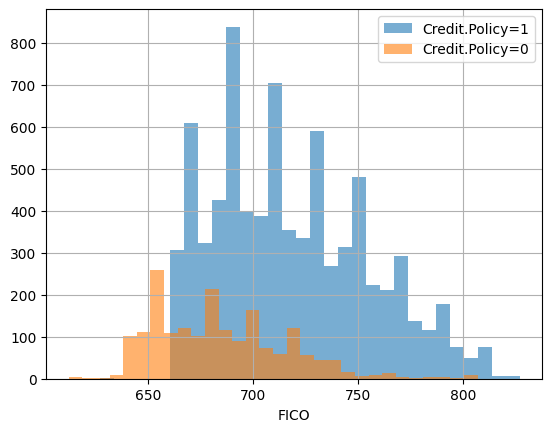

In [21]:
## FICO Score - Credid.Policy

# Filter the DataFrame to only include rows where 'credit.policy' is 1, then select the 'fico' column
df[df['credit.policy']==1]['fico'].hist(bins=30,alpha=0.6,label='Credit.Policy=1')

# Do the same for rows where 'credit.policy' is 0
df[df['credit.policy']==0]['fico'].hist(bins=30,alpha=0.6,label='Credit.Policy=0')

# Display the legend, which will show 'Credit.Policy=1' for the first histogram and 'Credit.Policy=0' for the second
plt.legend()

# Label the x-axis as 'FICO'
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

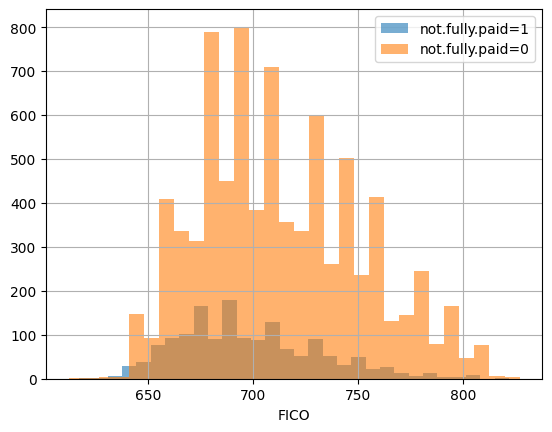

In [32]:
## FICO Score - not.fully.paid
df[df['not.fully.paid']==1]['fico'].hist(bins=30,alpha=0.6,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(bins=30,alpha=0.6,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Let's see the distribution of loan purposes, categorized by the repayment status of borrowers (whether a borrower fully paid the loan back or not).

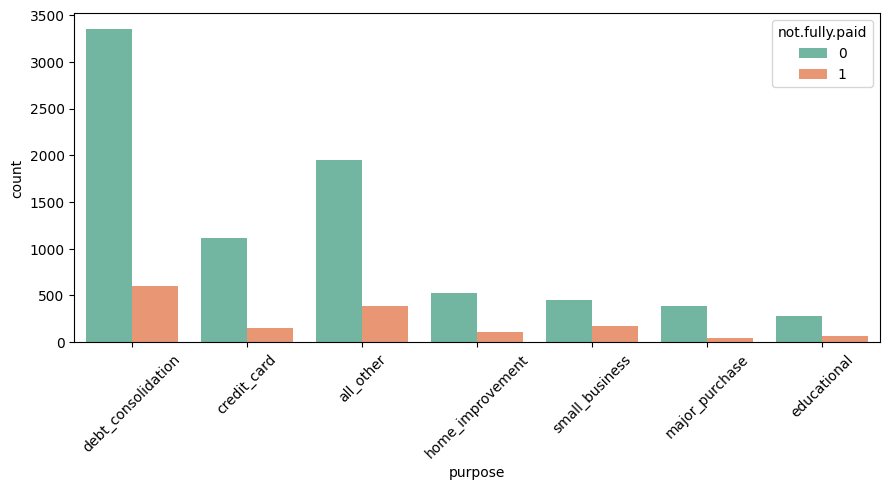

In [33]:
# Set the size of the figure to 9x5 inches
plt.figure(figsize=(9,5))

# Create a count plot of the 'purpose' column, with separate bars for each value of 'not.fully.paid'
# Use the 'Set2' color palette for the bars
sns.countplot(x=df['purpose'], hue=df['not.fully.paid'], palette='Set2')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust the padding between and around the subplots
plt.tight_layout()

Let's visualize the trend between FICO Score and the interest rate.

c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


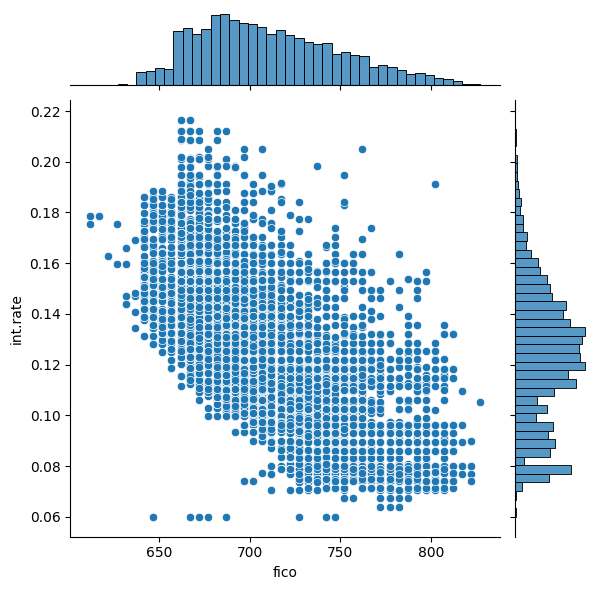

In [35]:
sns.jointplot(x='fico',y='int.rate',data=df)

## 2 - Modeling

First of all, we're going to transform the 'purpose' column from categorial to numerical so that sklearn can understand them.

In [36]:
# Creating a list of all categorical variables.
cat_var = ['purpose']

In [37]:
df_final = pd.get_dummies(df,columns=cat_var,drop_first=True)

### Train-Test Split

In [40]:
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Two predictive models were built and evaluated: Decision Tree and Random Forest.

### Decision Tree Model

In [43]:
# Initialize the model
dtree = DecisionTreeClassifier()

# Fit the model
dtree.fit(X_train, y_train)

# Predict the test set results
y_pred = dtree.predict(X_test)

# Print the accuracy of the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7292971468336813


In [44]:
# Print the classification report of the model's predictions
# The classification report includes metrics such as precision, recall, f1-score, and support (number of instances) for each class
# 'y_test' is the true labels, and 'predictions' are the labels predicted by the model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2412
           1       0.19      0.22      0.21       462

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



In [45]:
# Print the confusion matrix of the model's predictions
# The confusion matrix is a table that is often used to describe the performance of a classification model
# 'y_test' is the true labels, and 'predictions' are the labels predicted by the model
print(confusion_matrix(y_test,y_pred))

[[1995  417]
 [ 361  101]]


In [49]:
print(accuracy_score(y_test, y_pred))

0.7292971468336813


### Random Forest

In [46]:
# Create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
rfc.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
predictions = rfc.predict(X_test)

In [48]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))



# Print the overall accuracy
print("\nAccuracy:")
print(accuracy_score(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2412
           1       0.50      0.03      0.05       462

    accuracy                           0.84      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.84      0.77      2874

Confusion Matrix:
[[2399   13]
 [ 449   13]]

Accuracy:
0.8392484342379958


## 3 - Conclusions

### Modeling and Evaluation:
- The Decision Tree model exhibited a reasonable performance with an accuracy of approximately 73%.
- However, its precision and recall for predicting loan repayment were relatively low.
- On the other hand, the Random Forest model demonstrated improved performance, achieving an accuracy of around 84%.
- While the precision for predicting loan repayment remained moderate, the recall was notably higher compared to the Decision Tree model.

### Implications and Recommendations:
- The predictive models provide valuable insights for lenders in assessing the creditworthiness of borrowers and managing loan portfolios.
- Lenders can use the models to identify high-risk borrowers and tailor their lending strategies accordingly, potentially reducing default rates.
- Further refinement of the models, such as feature engineering and parameter tuning, may enhance predictive accuracy and robustness.
- Continuous monitoring and validation of the models with updated data are essential to ensure their effectiveness and relevance over time.

### Future Directions:
- Future research could explore additional predictive modeling techniques, such as gradient boosting or neural networks, to further improve model performance.
- Investigating the impact of macroeconomic factors and industry-specific trends on loan repayment could provide deeper insights into credit risk management.
- Collaboration with domain experts and stakeholders can enrich the analysis and interpretation of results, leading to more informed decision-making in the lending industry.

In conclusion, the analysis and modeling efforts have yielded valuable insights into loan repayment behavior, providing a foundation for more informed decision-making and risk management in the financial sector. Continued refinement and exploration of predictive modeling techniques offer opportunities for further enhancing the accuracy and applicability of credit risk assessment models.